# Credit Card Fraud Detection
**Acknowledgements: This dataset is from Kaggle.
For details, see https://www.kaggle.com/ntnu-testimon/paysim1/home**

## About this dataset


There is a lack of public available datasets on financial services and specially in the emerging mobile money transactions domain. Financial datasets are important to many researchers and in particular to us performing research in the domain of fraud detection. Part of the problem is the intrinsically private nature of financial transactions, that leads to no publicly available datasets.

We present a synthetic dataset generated using the simulator called PaySim as an approach to such a problem. PaySim uses aggregated data from the private dataset to generate a synthetic dataset that resembles the normal operation of transactions and injects malicious behaviour to later evaluate the performance of fraud detection methods.
Content

PaySim simulates mobile money transactions based on a sample of real transactions extracted from one month of financial logs from a mobile money service implemented in an African country. The original logs were provided by a multinational company, who is the provider of the mobile financial service which is currently running in more than 14 countries all around the world.

This synthetic dataset is scaled down 1/4 of the original dataset and it is created just for Kaggle.

### Headers

This is a sample of 1 row with headers explanation:

1,PAYMENT,1060.31,C429214117,1089.0,28.69,M1591654462,0.0,0.0,0,0

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.
Past Research

There are 5 similar files that contain the run of 5 different scenarios. These files are better explained at my PhD thesis chapter 7 (PhD Thesis Available here http://urn.kb.se/resolve?urn=urn:nbn:se:bth-12932).

We ran PaySim several times using random seeds for 744 steps, representing each hour of one month of real time, which matches the original logs. Each run took around 45 minutes on an i7 intel processor with 16GB of RAM. The final result of a run contains approximately 24 million of financial records divided into the 5 types of categories: CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

### Acknowledgements

This work is part of the research project ”Scalable resource-efficient systems for big data analytics” funded by the Knowledge Foundation (grant: 20140032) in Sweden.

Please refer to this dataset using the following citations:

PaySim first paper of the simulator:

E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016

## Before you start
1. Manually Download the dataset from Kaggle https://www.kaggle.com/ntnu-testimon/paysim1/downloads/PS_20174392719_1491204439457_log.csv/2 and upload to s3

### Preprocess step - Download the data from s3

In [4]:
bucket="<<your  bucket>"
prefix="<s3 prefix key for where your kaggle dataset resides without filename,e.g PaySimFraudDetection>"
bucket_prefix="{}/{}".format(bucket,prefix)

In [5]:
!aws s3 cp s3://$bucket_prefix/PS_20174392719_1491204439457_log.csv.zip ./paysim.zip

download: s3://aegovansagemaker/PaySimFraudDetection/PS_20174392719_1491204439457_log.csv.zip to ./paysim.zip


In [6]:
!unzip -o paysim.zip

Archive:  paysim.zip
  inflating: PS_20174392719_1491204439457_log.csv  


### Start

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the data into pandas

In [8]:
data = pd.read_csv('./PS_20174392719_1491204439457_log.csv')

### Explore the dataset 

In [9]:
data.head(n=10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [10]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


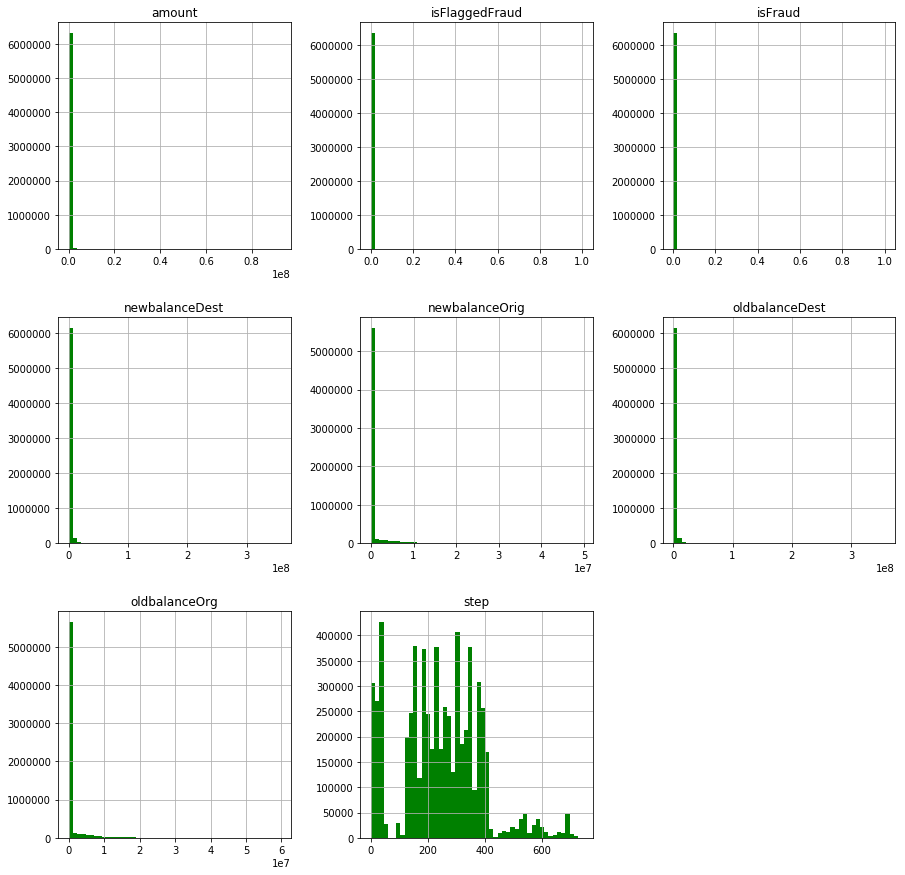

In [11]:
data.hist (bins=50, figsize=(15,15), color = 'green')
plt.show()

Distribution of transactions wrt to source account

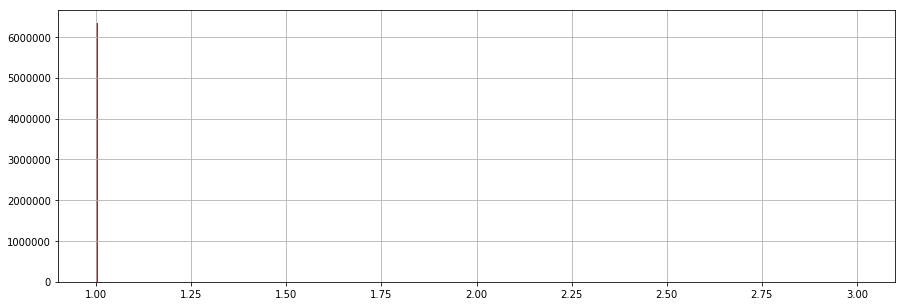

In [12]:
data['nameOrig'].value_counts().hist (bins=500, figsize=(15,5), color = 'red')
plt.show()

In [13]:
data['nameOrig'].value_counts().describe()

count    6.353307e+06
mean     1.001466e+00
std      3.832002e-02
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      3.000000e+00
Name: nameOrig, dtype: float64

Distribution of transactions wrt to dest account

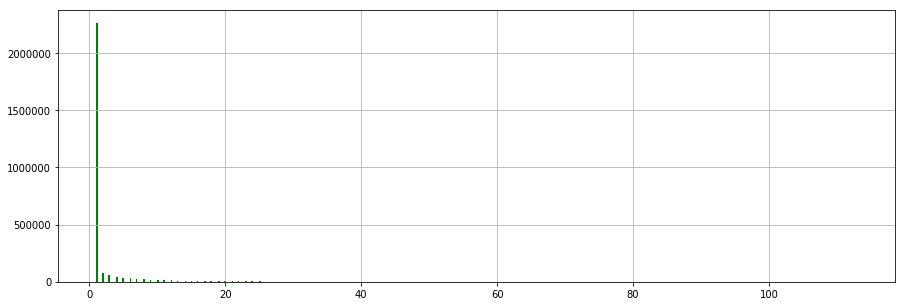

In [14]:
data['nameDest'].value_counts().hist (bins=500, figsize=(15,5), color = 'green')
plt.show()

In [15]:
data.sort_values(by=['step', 'nameOrig']).head(n=20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2332,1,DEBIT,2655.04,C10001825,21214.00,18558.96,C1850180796,1116396.05,1268668.92,0,0
1421,1,PAYMENT,2444.49,C1002041276,31454.00,29009.51,M485475507,0.00,0.00,0,0
1956,1,PAYMENT,1246.74,C1002911155,1468.00,221.26,M1467977993,0.00,0.00,0,0
100,1,PAYMENT,871.75,C1003206025,19869.00,18997.25,M989889899,0.00,0.00,0,0
2200,1,PAYMENT,264.93,C1003307628,0.00,0.00,M1595188851,0.00,0.00,0,0
247,1,PAYMENT,9029.12,C1003755748,25480.00,16450.88,M1414013111,0.00,0.00,0,0
994,1,PAYMENT,1617.90,C1004430079,507865.00,506247.10,M1379148981,0.00,0.00,0,0
883,1,CASH_OUT,59390.46,C100445376,0.00,0.00,C977993101,73791.34,965870.05,0,0
1007,1,PAYMENT,1213.64,C1006624255,86078.00,84864.36,M1721180011,0.00,0.00,0,0
1297,1,CASH_IN,377287.80,C100708535,5110945.41,5488233.21,C985934102,2256095.33,971418.91,0,0


Explore the class distribution

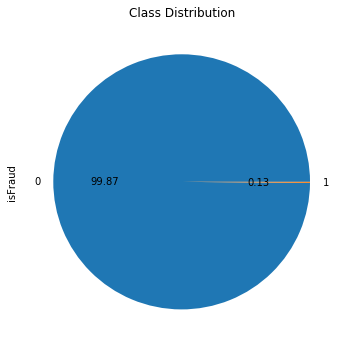

In [16]:
data.isFraud.value_counts().plot.pie(autopct='%.2f',figsize=(5, 5), colors=["green","cyan"], explode=[0,.1])
plt.title('Class Distribution')
plt.tight_layout()

View Correlation heatmap

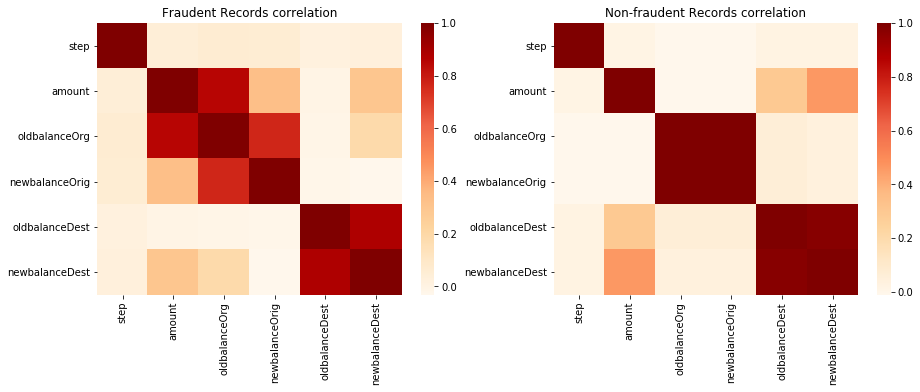

In [17]:
fig, ax = plt.subplots( 1,2, figsize=(15,5))

ax[0].set_title("Fraudent Records correlation")
sns.heatmap(data.query('isFraud == 1').drop(['isFraud', 'isFlaggedFraud'],1).corr(),  cmap="OrRd", ax=ax[0])

ax[1].set_title("Non-fraudent Records correlation")
sns.heatmap(data.query('isFraud == 0').drop(['isFraud', 'isFlaggedFraud'],1).corr(),  cmap="OrRd", ax=ax[1])
plt.show()

#### Source Amount and destination difference in balance dont match
When the record has the isFlaggedFraud = 1, this means that the transaction was detected and stopped from being processed, that is the reason why it didn't affect the account destination/origin (previous value). 

**Note:** there is not record of balance from clients that start with M (Merchants).



### Feature Engineering

#### Drop Correlated features

In [18]:
data_clean = data
data_clean = data_clean.drop(["newbalanceOrig", "newbalanceDest", "isFlaggedFraud" ],1)

#### Add new features

In [22]:
data_clean["isMerchantTransOrig"] = data_clean["nameOrig"].str.startswith('M').astype(int) 
data_clean["isMerchantTransDest"] = data_clean["nameDest"].str.startswith('M').astype(int) 

data_clean["isMerchantTrans"] = data_clean["isMerchantTransOrig"] |  data_clean["isMerchantTransDest"]

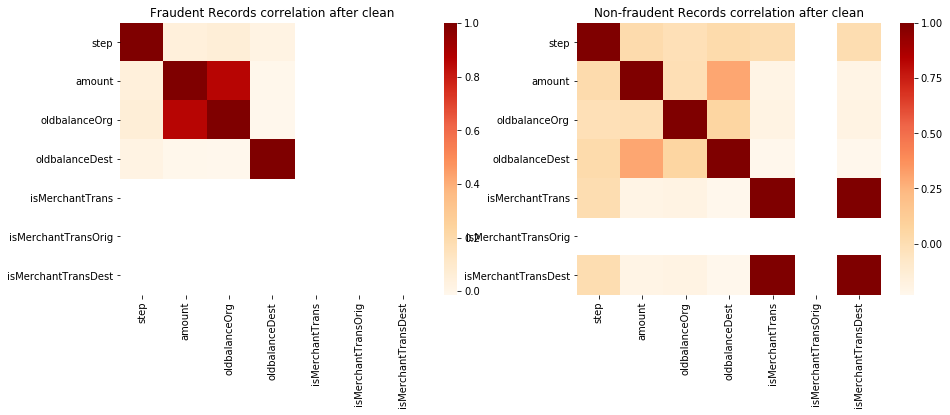

In [26]:
fig, ax = plt.subplots( 1,2, figsize=(15,5))


ax[0].set_title("Fraudent Records correlation after clean")
sns.heatmap(data_clean.query('isFraud == 1').drop(['isFraud'],1).corr(),  cmap="OrRd", ax=ax[0])

ax[1].set_title("Non-fraudent Records correlation after clean")
sns.heatmap(data_clean.query('isFraud == 0').drop(['isFraud'],1).corr(),  cmap="OrRd", ax=ax[1])
plt.show()

### Prepare dataset for SageMaker XGBoost

#### Column order - Labels in first column
Recorder columns such that the label is the first column. This is because of the format expected by XGBoost SageMaker implementation, for more details see https://docs.aws.amazon.com/sagemaker/latest/dg/xgboost.html

In [28]:
cols = data_clean.drop(["isFraud"],1).columns.tolist()
cols.insert(0, "isFraud")
data_clean = data_clean[cols]
data_clean.head(n=5)

,isFraud,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isMerchantTrans,isMerchantTransOrig,isMerchantTransDest
0,0,1,PAYMENT,9839.64,C1231006815,170136.0,M1979787155,0.0,1,0,1
1,0,1,PAYMENT,1864.28,C1666544295,21249.0,M2044282225,0.0,1,0,1
2,1,1,TRANSFER,181.00,C1305486145,181.0,C553264065,0.0,0,0,0
3,1,1,CASH_OUT,181.00,C840083671,181.0,C38997010,21182.0,0,0,0
4,0,1,PAYMENT,11668.14,C2048537720,41554.0,M1230701703,0.0,1,0,1


#### Unimportant non numerical column drop
XGBoost only works with numerical values, drop non-numerical columns source/des accounts 

In [29]:
data_clean = data_clean.drop([ 'nameOrig', 'nameDest'],1)

#### Onehot encode categorical columns 
XG boost only works with numerical values, so translate categorical columns into one-hot vector

In [30]:
data_clean =  pd.get_dummies(data_clean,prefix=['transaction_type'],  columns=['type']) 
data_clean.head(n=5)

,isFraud,step,amount,oldbalanceOrg,oldbalanceDest,isMerchantTrans,isMerchantTransOrig,isMerchantTransDest,transaction_type_CASH_IN,transaction_type_CASH_OUT,transaction_type_DEBIT,transaction_type_PAYMENT,transaction_type_TRANSFER
0,0,1,9839.64,170136.0,0.0,1,0,1,0,0,0,1,0
1,0,1,1864.28,21249.0,0.0,1,0,1,0,0,0,1,0
2,1,1,181.00,181.0,0.0,0,0,0,0,0,0,0,1
3,1,1,181.00,181.0,21182.0,0,0,0,0,1,0,0,0
4,0,1,11668.14,41554.0,0.0,1,0,1,0,0,0,1,0


#### Train test set split
Split the dataset into train, test and validation set

In [31]:
from sklearn.model_selection import train_test_split, learning_curve

train_val, test = train_test_split(data_clean, test_size = 0.2, random_state = 777)
train, validation = train_test_split(train_val, test_size = 0.2, random_state = 777)

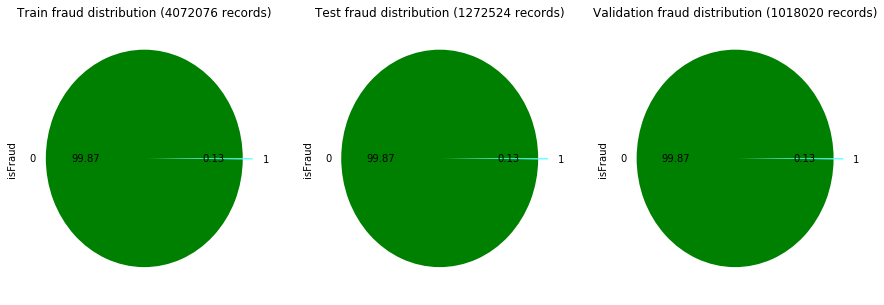

In [46]:
fig, ax = plt.subplots( 1,3, figsize=(15,5))

train.isFraud.value_counts().plot.pie(autopct='%.2f', ax = ax[0], colors=["green","cyan"], explode=[0,.1])
ax[0].set_title('Train fraud distribution ({} records)'.format(train.shape[0]))

test.isFraud.value_counts().plot.pie(autopct='%.2f', ax = ax[1], colors=["green","cyan"], explode=[0,.1])
ax[1].set_title('Test fraud distribution ({} records)'.format(test.shape[0]))

validation.isFraud.value_counts().plot.pie(autopct='%.2f', ax = ax[2], colors=["green","cyan"], explode=[0,.1])
ax[2].set_title('Validation fraud distribution ({} records)'.format(validation.shape[0]))

plt.show() 

In [47]:
trainfile="train_paysim.csv"
testfile="test_paysim.csv"
validationfile="validation_paysim.csv"

Write the records to file

In [48]:
train.to_csv(path_or_buf=trainfile, sep=',', na_rep='', header=False, index=False,  mode='w', encoding='UTF-8', quotechar='"', line_terminator='\n', decimal='.')
test.to_csv(path_or_buf=testfile, sep=',', na_rep='', header=False, index=False,  mode='w', encoding='UTF-8', quotechar='"', line_terminator='\n', decimal='.')
validation.to_csv(path_or_buf=validationfile, sep=',', na_rep='', header=False, index=False,  mode='w', encoding='UTF-8', quotechar='"', line_terminator='\n', decimal='.')

In [49]:
!head train_paysim.csv

0,203,16894.96,443240.04,197879.16,0,0,0,1,0,0,0,0
0,514,2803.27,0.0,0.0,1,0,1,0,0,0,1,0
0,286,12518.66,50718.0,0.0,1,0,1,0,0,0,1,0
0,209,25650.28,0.0,1384324.66,0,0,0,0,1,0,0,0
0,255,418089.5,7037.0,0.0,0,0,0,0,0,0,0,1
0,546,226999.24,416906.0,136127.66,0,0,0,1,0,0,0,0
0,165,5559.01,20048.0,0.0,1,0,1,0,0,0,1,0
0,400,7509.56,58741.53,0.0,1,0,1,0,0,0,1,0
0,546,162003.29,101689.0,240054.15,0,0,0,0,1,0,0,0
0,155,211360.31,2851164.79,4034640.69,0,0,0,1,0,0,0,0


Copy the data to s3 into train and test channels

In [50]:
s3train="s3://{}/train/{}".format(bucket_prefix, trainfile)
s3validation="s3://{}/validation/{}".format(bucket_prefix, validationfile)

!aws s3 cp $trainfile $s3train
!aws s3 cp $validationfile $s3validation


upload: ./train_paysim.csv to s3://aegovansagemaker/PaySimFraudDetection/train/train_paysim.csv
upload: ./validation_paysim.csv to s3://aegovansagemaker/PaySimFraudDetection/validation/validation_paysim.csv



## Training the XGBoost model

After setting training parameters, we kick off training, and poll for status until training is completed, which in this example, takes between 5 and 6 minutes.


In [51]:
import boto3
from sagemaker.amazon.amazon_estimator import get_image_uri
container = get_image_uri(boto3.Session().region_name, 'xgboost')
from sagemaker import get_execution_role
role = get_execution_role()


In [52]:
%%time
import boto3
from time import gmtime, strftime

job_name = 'Fraud-xgboost-classification-' + strftime("%Y-%m-%d-%H-%M-%S", gmtime())
print("Training job", job_name)

#Ensure that the training and validation data folders generated above are reflected in the "InputDataConfig" parameter below.

create_training_params = \
{
    "AlgorithmSpecification": {
        "TrainingImage": container,
        "TrainingInputMode": "File"
    },
    "RoleArn": role,
    "OutputDataConfig": {
        "S3OutputPath": "s3://{}/single-xgboost".format(bucket_prefix)
    },
    "ResourceConfig": {
        "InstanceCount": 1,
        "InstanceType": "ml.m4.4xlarge",
        "VolumeSizeInGB": 5
    },
    "TrainingJobName": job_name,
    "HyperParameters": {
        "max_depth":"5",
        "eta":"0.2",
        "gamma":"4",
        "min_child_weight":"6",
        "subsample":"0.7",
        "silent":"0",
        "objective":"reg:logistic",
        "num_round":"50",
        "eval_metric":"auc"
    },
    "StoppingCondition": {
        "MaxRuntimeInSeconds": 3600
    },
    "InputDataConfig": [
        {
            "ChannelName": "train",
            "DataSource": {
                "S3DataSource": {
                    "S3DataType": "S3Prefix",
                    "S3Uri": s3train,
                    "S3DataDistributionType": "FullyReplicated"
                }
            },
            "ContentType": "csv",
            "CompressionType": "None"
        },
        {
            "ChannelName": "validation",
            "DataSource": {
                "S3DataSource": {
                    "S3DataType": "S3Prefix",
                    "S3Uri": s3validation,
                    "S3DataDistributionType": "FullyReplicated"
                }
            },
            "ContentType": "csv",
            "CompressionType": "None"
        }
    ]
}


client = boto3.client('sagemaker')
client.create_training_job(**create_training_params)

import time

status = client.describe_training_job(TrainingJobName=job_name)['TrainingJobStatus']
print(status)
while status !='Completed' and status!='Failed':
    time.sleep(60)
    status = client.describe_training_job(TrainingJobName=job_name)['TrainingJobStatus']
    print(status)

Training job Fraud-xgboost-classification-2018-10-02-02-10-43
InProgress
InProgress
InProgress
InProgress
Completed
CPU times: user 84 ms, sys: 4 ms, total: 88 ms
Wall time: 4min


### Create Model

In [56]:
%%time
import boto3
from time import gmtime, strftime

model_name=job_name + '-model'
print(model_name)

info = client.describe_training_job(TrainingJobName=job_name)
model_data = info['ModelArtifacts']['S3ModelArtifacts']
print(model_data)

primary_container = {
    'Image': container,
    'ModelDataUrl': model_data
}

create_model_response = client.create_model(
    ModelName = model_name,
    ExecutionRoleArn = role,
    PrimaryContainer = primary_container)

print(create_model_response['ModelArn'])

Fraud-xgboost-classification-2018-10-02-02-10-43-model
s3://aegovansagemaker/PaySimFraudDetection/single-xgboost/Fraud-xgboost-classification-2018-10-02-02-10-43/output/model.tar.gz
arn:aws:sagemaker:us-east-2:324346001917:model/fraud-xgboost-classification-2018-10-02-02-10-43-model
CPU times: user 72 ms, sys: 0 ns, total: 72 ms
Wall time: 294 ms


### Create Endpoint

In [ ]:
from time import gmtime, strftime

endpoint_config_name = 'DEMO-XGBoostEndpointConfig-' + strftime("%Y-%m-%d-%H-%M-%S", gmtime())
print(endpoint_config_name)
create_endpoint_config_response = client.create_endpoint_config(
    EndpointConfigName = endpoint_config_name,
    ProductionVariants=[{
        'InstanceType':'ml.m4.xlarge',
        'InitialVariantWeight':1,
        'InitialInstanceCount':1,
        'ModelName':model_name,
        'VariantName':'AllTraffic'}])

print("Endpoint Config Arn: " + create_endpoint_config_response['EndpointConfigArn'])

In [ ]:
%%time
import time

endpoint_name = 'DEMO-XGBoostEndpoint-' + strftime("%Y-%m-%d-%H-%M-%S", gmtime())
print(endpoint_name)
create_endpoint_response = client.create_endpoint(
    EndpointName=endpoint_name,
    EndpointConfigName=endpoint_config_name)
print(create_endpoint_response['EndpointArn'])

resp = client.describe_endpoint(EndpointName=endpoint_name)
status = resp['EndpointStatus']
print("Status: " + status)

while status=='Creating':
    time.sleep(60)
    resp = client.describe_endpoint(EndpointName=endpoint_name)
    status = resp['EndpointStatus']
    print("Status: " + status)

print("Arn: " + resp['EndpointArn'])
print("Status: " + status)

### Option A - Predict your test set through the inference endpoint

In [ ]:
runtime_client = boto3.client('runtime.sagemaker')

In [ ]:
%%time
import json
from itertools import islice
import math
import struct

file_name = testfile 
with open(file_name, 'r') as f:
    lines = f.readlines()
    
input_records = [",".join(l.strip().split(",")[1:]) for l in lines]
labels = [int(l.split(",")[0]) for l in lines]



In [ ]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

In [ ]:
%%time
predicted = []
for record_chunks in chunks(input_records, 10000):
    formatted = "\n".join(record_chunks)
    response = runtime_client.invoke_endpoint(EndpointName=endpoint_name, 
                                   ContentType='text/csv', 
                                   Body=formatted.encode('utf-8'))
    result = response['Body'].read()
    result = result.decode("utf-8")
    predicted.extend([float(r) for r in result.split(',')])
    
    print("Predicted {} out of {} so far ..".format(len(predicted), len(input_records)))


In [ ]:
import sklearn
    
macro_score = sklearn.metrics.average_precision_score(labels, predicted, average='macro',  sample_weight=None)

print("The AUC under precision recall curve is ".format(micro_score, macro_score))

In [ ]:
confidence_threshold=.5

In [ ]:
confusion_matrix = sklearn.metrics.confusion_matrix(labels, pd.DataFrame(predicted) > confidence_threshold, labels=[1,0], sample_weight=None)
confusion_matrix

In [ ]:
import seaborn as sn
df_cm = pd.DataFrame(
        confusion_matrix, index=["Fraud", "Non-Fraud"], columns=["Fraud", "Non-Fraud"], 
)
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt="d", cmap="tab10" )
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(labels, pd.DataFrame(predicted) > confidence_threshold, average=None)

In [ ]:
client.delete_endpoint(EndpointName=endpoint_name)

### Option B - Predict your test set through without deploying an endpoint using batch transform

In [57]:
batchfileinput="batchvalidation.csv"

In [58]:
%%time
import json
from itertools import islice
import math
import struct

file_name = testfile 
with open(file_name, 'r') as f:
    lines = f.readlines()
    
input_records = [",".join(l.strip().split(",")[1:]) for l in lines]
labels = [int(l.split(",")[0]) for l in lines]


with open(batchfileinput , "w") as f:
    f.writelines(["{}\n".format(item) for item in input_records])
                                          

CPU times: user 2.86 s, sys: 256 ms, total: 3.12 s
Wall time: 3.16 s


In [59]:
%%time
import boto3
import sagemaker
import json

fmttime= strftime("%Y-%m-%d-%H-%M-%S", gmtime())
input_key_file="batchvalidation.csv"
input_batch_key="{}/batchTransform/{}_input/{}".format(prefix, fmttime, input_key_file)
input_location = 's3://{}/{}'.format(bucket, input_batch_key)
output_batch_key = "{}/batchTransform/{}_output".format(prefix,fmttime)
output_location = 's3://{}/{}'.format(bucket, output_batch_key)


s3_client = boto3.client('s3')
s3_client.upload_file(batchfileinput, bucket, input_batch_key)

# Initialize the transformer object
transformer =sagemaker.transformer.Transformer(
    base_transform_job_name='Batch-Transform',
    model_name=model_name,
    instance_count=1,
    instance_type='ml.c4.xlarge',
    output_path=output_location
    )
# To start a transform job:
transformer.transform(input_location, content_type='text/csv', split_type='Line')
# Then wait until transform job is completed
transformer.wait()

# To fetch validation result 
outputkey ='{}/{}.out'.format(output_batch_key, input_key_file)
print(outputkey)
s3_client.download_file(bucket, outputkey, 'batch-result.csv')
with open('batch-result.csv') as f:
    results = f.readlines()   
    predicted = [float(r) for r in results]
print("Sample transform result: {}".format(results[0]))

INFO:sagemaker:Creating transform job with name: Batch-Transform-2018-10-02-02-19-24-759


..................................!
PaySimFraudDetection/batchTransform/2018-10-02-02-19-23_output/batchvalidation.csv.out
Sample transform result: 3.35121549142e-05

CPU times: user 1.4 s, sys: 224 ms, total: 1.62 s
Wall time: 2min 54s


In [61]:
import sklearn
micro_score = sklearn.metrics.average_precision_score(labels, predicted, average='micro',  sample_weight=None)
print("AUC under precision recall curve is {}".format(micro_score))

AUC under precision recall curve is 0.772280560036118
